## HINF 5502: Third-party Python software and distributions

This is a demonstration notebook of some of the packages discussed in the Week 11 lecture. I have some commentary inside, but note that I may have more commentary in my recorded lecture. If you've installed the [Anaconda Python](http://continuum.io) distribution, you should have all of the tools you need.

First, let's import the packages, which I'll do in one step. We're using the convention of `import ... as ...`, which will let us use functions and objects in the modules using abbreviations. You can use any abbreviation you want, but the abbreviations below have become the conventional ways to refer to these major packages. The last command is actually one for the notebook system, and tells it to take any graphics generated by [Matplotlib](http://www.matplotlib.org) (or Seaborn) and paste them into the notebook "inline" by default.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

[NumPy](http://www.numpy.org/) implements fast and efficient arrays, which are like Python lists, but are generally restricted to one data type for all of the elements. This may seem like a step backwards, but by constraining arrays to one data type, a lot of things are made faster. The NumPy package also brings a host of mathematical and other functions to work on arrays, many more than what come with Python itself.

When we think of arrays in a mathematical sense, we usually think of two-dimensional arrays and linear algebra. While NumPy does not just work with 2D arrays (they can be 1D, 3D, or any dimension), we can do a lot of linear algebra operations, which typically involve 2D numerical arrays. For example, we can create the 2D array

$$\left[\begin{array}
{rrr}
1 & 2 \\
3 & 4
\end{array}\right]
$$

using the `np.array()` function. Note that it looks mostly like a list of lists:

In [2]:
my_matrix = np.array([[1, 2], [3, 4]])
my_matrix

array([[1, 2],
       [3, 4]])

As you might expect, we can do all kinds of linear algebra "things" to this array, such as finding the inverse:

In [3]:
my_matrix_inv = np.linalg.inv(my_matrix)
my_matrix_inv

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

If we multiplied the two matrices together using standard matrix multiplication, we'd get the identity matrix. (If you're not familiar with linear algebra and don't know what this means, don't worry!)

More interesting is using the arrays to solve systems of linear equations. If you've taken linear algebra and done things like Gaussian elimination to solve such systems, you can do the same thing with NumPy. Here is a system of four equations and four unknowns:

$$
\begin{aligned}
2w-x+5y+z=-3 \\
3w+2x+2y-6z=-32 \\
w+3x+3y-z=-47 \\
5w-2x-3y+3z=49
\end{aligned}
$$

Solving this is actually pretty easy. We can take the coefficients on each side of the equations, and make them into arrays, then plug them into `np.linalg.solve()`:

In [4]:
leftside = np.array([[2, -1, 5, 1], [3, 2, 2, -6], [1, 3, 3, -1], [5, -2, -3, 3]])
rightside = np.array([-3, -32, -47, 49])
solution = np.linalg.solve(leftside, rightside)
solution

array([  2., -12.,  -4.,   1.])

Thus, *w* = 2, *x* = -12, *y* = -4, and *z* = 1. If you plug those numbers into the equations, all of them will work.

### Random number generation and plotting

Here's something a little more interesting. We'll make a 1D array composed of 10,000 random normally-distributed numbers, with a mean of 100, and a standard deviation of 20. The base Python distribution, using the `random` library, can generate these numbers, but NumPy has its own functions to do this. The first command sets the *seed* for the random number generator, so that I can generate the same list of random numbers each time I run this (and you can, too). The third command shows us the first ten numbers generated.

In [5]:
np.random.seed(5502) # I can use any number here, and just chose the course number for fun!
my_sample = np.random.normal(100, 20, 10000)
my_sample[0:10]

array([ 94.33524784, 108.02934025,  97.35417356,  99.25560324,
       100.65609013, 122.10688732,  92.2056135 , 101.84476819,
       110.17498942,  88.46646567])

We can use Matplotlib to generate a histogram of the 10,000 numbers. The different commands set different options and aspects of the plot.

In [ ]:
plt.hist(my_sample, 50)
plt.title("Histogram of random normal variates")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

This looks pretty much like a normal distribution. It's not perfect, but it only has 10,000 numbers in it. As we add more numbers, it would smooth out further, but this is pretty good already.

### Speed and efficiency

So far, aside from the functions that do linear algebra, it's hard to see what the advantage of NumPy is over just using built-in Python lists. We can illustrate this with an example, though. Let's take our NumPy array of the random numbers, then calculate their reciprocals (*i.e.*, if a number is *x*, then calculate 1/*x*). First, let's convert the NumPy array into an ordinary list:

In [6]:
my_list = list(my_sample)

Now, calculate the reciprocals and put them in a new list. I'm using a list comprehension to do this, but it could just as easily be set up as a `for` loop. Then we'll take a peek at the first ten reciprocals.

In [7]:
my_reciprocals1 = [1/x for x in my_list]
my_reciprocals1[0:10]

[0.010600491575711305,
 0.009256744488739277,
 0.010271773293757221,
 0.010074997958411944,
 0.00993481863543973,
 0.008189546240683436,
 0.010845326678065622,
 0.009818864706872389,
 0.00907647012472204,
 0.011303718221963917]

Nothing very controversial here. Now, let's create a NumPy array of the reciprocals. Below is the command to do it. Note that it's not a `for` loop, nor is it a comprehension. In fact, it looks like a very simple calculation. This is one of the NumPy advantages: arrays are *vectorized*, meaning that if we apply a mathematical function to an array, it's understood that the function should be applied to every element in the array automatically! Here, it's understood that this new array is to be composed of the reciprocals of the original array.

Because `my_reciprocals2` is a NumPy array object, the output is formatted a little differently when printed. That's why we see the first ten reciprocals in two rows this time, and with fewer decimal places.

In [8]:
my_reciprocals2 = 1 / my_sample
my_reciprocals2[0:10]

array([0.01060049, 0.00925674, 0.01027177, 0.010075  , 0.00993482,
       0.00818955, 0.01084533, 0.00981886, 0.00907647, 0.01130372])

Here is where it gets more interesting. The notebook system has a mechanism to find the running times of commands. For the first command, we are timing the base Python list version of the reciprocal calculations. In the second command, we're timing the NumPy version.

In [12]:
%timeit my_reciprocals1 = [1/x for x in my_list]

4.69 ms ± 875 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
%timeit my_reciprocals2 = 1 / my_sample

14.1 µs ± 766 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


The commands were run 100 and 10,000 times, respectively, and the best timings were reported. It took about 1.7 milliseconds for the reciprocals to be calculated using the Python lists on my work iMac, and 8.4 *micro*seconds for the NumPy calculations to finish. Basically, the NumPy version ran over 200 times faster! Again, this is due to the way in which the NumPy arrays are implemented, as well as how the vectorization works.

From our standpoint, this isn't very much time in either instance, but imagine if you were calculating millions of such numbers. The time savings would add up quickly!

### Pandas and data manipulation

For the last part of this demonstration, we'll use the [Pandas](http://pandas.pydata.org/) package to do some data manipulation. Pandas is actually written with NumPy as its basis. The `DataFrame` object that Pandas defines is actually a special form of a NumPy array. The easiest way to think about this is is NumPy arrays are extremely efficient versions of Python lists, Pandas data frames are extremely efficient versions of Python dictionaries. That is, we can have keys of an arbitrary nature to refer to different values. Another way of thinking about this is that Pandas data frames are much like data frames in R, if you have worked with that statistical software package: we can have multiple lists put together in one structure. Each list is of a particular data type (strings, numbers, dates, *etc.*), but different lists can have different types. This is a natural way of thinking about rectangular, tabular data, such as is used in statistical software. It's also much like some of the data files we've practiced reading and calculating with in this course.

Let's read in two files with data. One is a file consisting of seven synthetic (fake) pediatric patients staying at a hospital, and the second is real data on 2013-2014 participants in the [NHANES](http://www.cdc.gov/nchs/nhanes.htm) (National Health and Nutrition Examination Survey) study, a long-term study that has gone on for several decades in the United States. The pediatric data is in a tab-delimited format, and the NHANES data is in a comma-delimited format. We've practiced reading in tab-delimited data in this course, and you can probably figure out how to read in comma-delimited data as well. Pandas has functions to not only read this data in, but automatically turn it into data frame objects. Much easier than writing all the code yourself!

If you have the two data files in the same folder as this notebook, you can run the code below without changes.

In [14]:
patients = pd.read_table("patients.txt")
nhanes = pd.read_csv("nhanes.csv")

We'll take a look at the pediatric patient data first. The notebook interface automatically takes the data and formats it as an easy-to-read table, which is a nice bonus:

In [15]:
patients

,patientid,lastname,firstname,birthdate,sex,admit,discharge,los,physician,dx1
0,55421,Blaine,Richard,1/5/12,M,11/30/15,12/30/15,31,Anderson,300.01
1,55426,Lazlo,Ilsa,7/6/10,F,11/10/15,11/21/15,12,Anderson,518.81
2,55427,Lazlo,Victor,5/13/07,M,11/2/15,11/3/15,2,Jones,493.22
3,55983,Renault,Louis,3/25/04,M,11/1/15,11/2/15,2,Jones,518.81
4,55678,Strasser,Heinrich,4/30/07,M,11/4/15,11/5/15,2,Gonzalez,493.02
5,55900,Ugarte,Peter,1/5/13,M,11/8/15,11/19/15,12,Gonzalez,518.81
6,55801,Ferrari,Sidney,4/5/08,F,11/10/15,11/21/15,12,Gonzalez,493.02


Here we have patient ID number, last name, first name, birthdate, sex, admit and discharge dates from the hospital, length of stay (LOS), the attending physician's name, and the patient's primary diagnosis as an ICD-9 code. ICD-9 is an older coding system for diseases and conditions, and was used in the US from 1988 to 2015. Let's suppose we wanted to find the current ages of the patients, derived from the birthdates. When first read in, anything that is not strictly a number is interpreted as a string by Pandas. As such, the dates in the data are just considered strings. However, Pandas (and NumPy) have a special date data type, which can make it easy to do date arithmetic. It's not hard to convert the string birthdates into objects Pandas actually understands as calendar dates.

The following command takes all the data in the `birthdate` column and turns it into Datetime objects.

In [16]:
pd.to_datetime(patients["birthdate"])

0   2012-01-05
1   2010-07-06
2   2007-05-13
3   2004-03-25
4   2007-04-30
5   2013-01-05
6   2008-04-05
Name: birthdate, dtype: datetime64[ns]

We can then make a command that takes these objects and replaces the original strings with the new dates. Note how easy it is to specify that we want to replace all the data. No loops are required! We'll then look at the data a second time.

In [17]:
patients["birthdate"] = pd.to_datetime(patients["birthdate"])
patients

,patientid,lastname,firstname,birthdate,sex,admit,discharge,los,physician,dx1
0,55421,Blaine,Richard,2012-01-05,M,11/30/15,12/30/15,31,Anderson,300.01
1,55426,Lazlo,Ilsa,2010-07-06,F,11/10/15,11/21/15,12,Anderson,518.81
2,55427,Lazlo,Victor,2007-05-13,M,11/2/15,11/3/15,2,Jones,493.22
3,55983,Renault,Louis,2004-03-25,M,11/1/15,11/2/15,2,Jones,518.81
4,55678,Strasser,Heinrich,2007-04-30,M,11/4/15,11/5/15,2,Gonzalez,493.02
5,55900,Ugarte,Peter,2013-01-05,M,11/8/15,11/19/15,12,Gonzalez,518.81
6,55801,Ferrari,Sidney,2008-04-05,F,11/10/15,11/21/15,12,Gonzalez,493.02


This doesn't look very different, but note the subtle change in what the dates look like in the birthdate column. This is simply how Datetime objects are written out. Now we can calculate ages. The easiest way is to figure out how many years are between the birthdate and the current date. There is a function that gives us the current date and time:

In [18]:
pd.datetime.now()

datetime.datetime(2018, 4, 16, 15, 51, 5, 458866)

What's returned in the parentheses is the current date and time, from largest quantity to the smallest (the final number is the number of microseconds!). With the following expression, we can create a new column called `age` in the data frame, calculating the difference between the current date and each birthdate, and then taking the year part of what is left over. When we print `patients` again, we can see the new column at the end.

In [19]:
patients["age"] = (pd.datetime.now() - patients["birthdate"]).astype("timedelta64[Y]").astype("int")
patients

,patientid,lastname,firstname,birthdate,sex,admit,discharge,los,physician,dx1,age
0,55421,Blaine,Richard,2012-01-05,M,11/30/15,12/30/15,31,Anderson,300.01,6
1,55426,Lazlo,Ilsa,2010-07-06,F,11/10/15,11/21/15,12,Anderson,518.81,7
2,55427,Lazlo,Victor,2007-05-13,M,11/2/15,11/3/15,2,Jones,493.22,10
3,55983,Renault,Louis,2004-03-25,M,11/1/15,11/2/15,2,Jones,518.81,14
4,55678,Strasser,Heinrich,2007-04-30,M,11/4/15,11/5/15,2,Gonzalez,493.02,10
5,55900,Ugarte,Peter,2013-01-05,M,11/8/15,11/19/15,12,Gonzalez,518.81,5
6,55801,Ferrari,Sidney,2008-04-05,F,11/10/15,11/21/15,12,Gonzalez,493.02,10


Let's now turn to the NHANES data set. There are 10,175 observations in this data set. If we just typed `nhanes`, the notebook would be smart enough not to print them all, but it would still print quite a few of them. We can use the `head()` function to just get the first few observations to see the general structure:

In [20]:
nhanes.head()

,id,sex,age,ethnicity,edu,income,height,weight,bmi,systolic,diastolic,hdl,ldl,totalchol,trigs,glucose,cigs30
0,73557.0,Male,69,Black,HS grad/GED,$15K-<$20K,171.3,78.3,26.7,122.0,72.0,65.0,NaN,167.0,NaN,NaN,NaN
1,73558.0,Male,54,White,HS grad/GED,$35K-<$45K,176.8,89.5,28.6,156.0,62.0,50.0,NaN,170.0,NaN,NaN,1.0
2,73559.0,Male,72,White,Some college/AA,$65K-<$75K,175.3,88.9,28.9,140.0,90.0,60.0,56.0,126.0,51.0,193.0,NaN
3,73560.0,Male,9,White,NaN,$55K-<$65K,137.3,32.2,17.1,108.0,38.0,61.0,NaN,168.0,NaN,NaN,NaN
4,73561.0,Female,73,White,College graduate or above,$100K+,162.4,52.0,19.7,136.0,86.0,85.0,101.0,201.0,75.0,107.0,NaN


This data consists of an ID number, the sex, age, ethnicity, education and income levels of the participants, as well as some clinical data. You can probably guess what many of them are:

- height
- weight
- body-mass index (our old friend!)
- systolic and diastolic blood pressure
- high- and low-density lipoproteins (*i.e.*, "good" and "bad" cholesterol)
- total cholesterol (includes more than just HDL and LDL levels)
- triglycerides (another measure of lipid levels)
- blood glucose
- number of cigarettes smoked in the last 30 days

The full NHANES data set includes literally hundreds of variables measured for each person, so this is only a tiny portion. Note that not all information is recorded for all participants. In Pandas, the convention is to put `NaN` (Not-a-Number) as a flag for missing data.

Let's suppose that we want to filter the data so that only patients 18 years of age and older are included. This is easy to do in Pandas. Again, the operations are vectorized, and there is no need to create loops:

In [21]:
nhanes_adults = nhanes[nhanes["age"] >= 18]
nhanes_adults.head()

,id,sex,age,ethnicity,edu,income,height,weight,bmi,systolic,diastolic,hdl,ldl,totalchol,trigs,glucose,cigs30
0,73557.0,Male,69,Black,HS grad/GED,$15K-<$20K,171.3,78.3,26.7,122.0,72.0,65.0,NaN,167.0,NaN,NaN,NaN
1,73558.0,Male,54,White,HS grad/GED,$35K-<$45K,176.8,89.5,28.6,156.0,62.0,50.0,NaN,170.0,NaN,NaN,1.0
2,73559.0,Male,72,White,Some college/AA,$65K-<$75K,175.3,88.9,28.9,140.0,90.0,60.0,56.0,126.0,51.0,193.0,NaN
4,73561.0,Female,73,White,College graduate or above,$100K+,162.4,52.0,19.7,136.0,86.0,85.0,101.0,201.0,75.0,107.0,NaN
5,73562.0,Male,56,Mexican American,Some college/AA,$55K-<$65K,158.7,105.0,41.7,160.0,84.0,38.0,NaN,226.0,NaN,NaN,NaN


We can do some rather sophisticated things with this data using Pandas, things that we usually require a stats package, or perhaps Microsoft Excel, to do. The following calculates the average values, by sex, for the numerical columns in the data. Note that taking the mean of `id` isn't very helpful, but it is a numeric column, so was included in the command.

In [22]:
nhanes_adults.groupby("sex").mean()

,id,age,height,weight,bmi,systolic,diastolic,hdl,ldl,totalchol,trigs,glucose,cigs30
sex,,,,,,,,,,,,,
Female,78662.207382,47.468251,160.472747,75.985794,29.445386,120.476973,68.357015,57.103857,110.189828,191.029770,109.513514,104.019732,11.728597
Male,78709.447874,47.294582,174.329095,86.445961,28.342350,124.558476,70.606476,47.940015,109.460568,184.084203,128.479969,109.794793,12.561194


We can calculate such statistics on multiple levels. The following shows means within each sex, and also within each ethnic group:

In [23]:
nhanes_adults.groupby(["ethnicity", "sex"]).mean()

id        age      height     weight  \
ethnicity         sex                                                      
Black             Female  78677.978261  45.986025  162.747280  84.370305   
                  Male    78701.285246  48.042623  176.364463  89.708007   
Mexican American  Female  78618.874429  43.292237  157.025829  75.725943   
                  Male    78698.139024  44.987805  170.470483  85.859033   
Other Hispanic    Female  78945.153595  46.111111  158.106463  72.535714   
                  Male    78441.598291  45.854701  171.032743  83.142035   
Other/Multiracial Female  78806.765458  44.373134  157.855204  63.925566   
                  Male    78696.450116  44.111369  171.398768  76.985679   
White             Female  78553.583582  50.938806  161.947068  76.948710   
                  Male    78772.725426  49.080422  176.236416  88.883993   

                                bmi    systolic  diastolic        hdl  \
ethnicity         sex                                                   
Black             Female  31.845586  123.630824  68.892473  58.692845   
                  Male    28.743590  128.314286  71.160714  51.761553   
Mexican American  Female  30.630095  118.304462  67.627297  52.381643   
                  Male    29.457761  124.360111  70.177285  46.611111   
Other Hispanic    Female  28.974403  119.492857  67.950000  55.305263   
                  Male    28.292478  124.162679  69.856459  46.308411   
Other/Multiracial Female  25.561312  117.509901  69.163366  58.621176   
                  Male    26.068395  123.139108  71.884514  47.331620   
White             Female  29.335266  120.937182  68.159593  57.828435   
                  Male    28.561591  123.294434  70.170557  47.097246   

                                 ldl   totalchol       trigs     glucose  \
ethnicity         sex                                                      
Black             Female  107.889299  184.429319   77.221402  102.558394   
                  Male    108.184739  179.236599   98.312000  109.443137   
Mexican American  Female  107.664865  187.364734  118.283422  109.817204   
                  Male    114.798817  190.452381  150.148571  115.182857   
Other Hispanic    Female  115.124088  196.031579  144.637681  106.921429   
                  Male    118.437500  191.584112  123.122449  111.828283   
Other/Multiracial Female  108.145729  191.649412  104.235000   99.290640   
                  Male    110.263441  187.452442  129.342105  107.649215   
White             Female  111.549669  193.897538  114.955738  103.818182   
                  Male    106.651408  181.760757  135.507692  108.694539   

                             cigs30  
ethnicity         sex                
Black             Female  14.712121  
                  Male     8.265537  
Mexican American  Female   7.920000  
                  Male     5.413333  
Other Hispanic    Female   9.125000  
                  Male    11.175000  
Other/Multiracial Female   8.111111  
                  Male     8.000000  
White             Female  11.561905  
                  Male    18.118421

A slightly different command gives us the mean for just one column, BMI. Since it's just one column, the notebook interface doesn't convert it to a nice table, but it's easy enough to read.

In [24]:
pd.pivot_table(nhanes_adults, "bmi", "sex")

,bmi
sex,
Female,29.445386
Male,28.342350


We can use the same command for multi-level tables as well. Here is BMI by sex and ethnicity:

In [25]:
pd.pivot_table(nhanes_adults, "bmi", "ethnicity", "sex")

sex,Female,Male
ethnicity,,
Black,31.845586,28.743590
Mexican American,30.630095,29.457761
Other Hispanic,28.974403,28.292478
Other/Multiracial,25.561312,26.068395
White,29.335266,28.561591


Finally, let's create a plot of all the adult BMIs, with age on the *x*-axis, and BMI on the *y*-axis. We'll give males and females different colors. Since there are so many points, we will make them partially transparent, so that it's not a big wall of color. This is what the `alpha` in the command means: make the points 20% opaque (0% would make them completely transparent, and thus invisible!). While we can do this in Matplotlib, the Seaborn package has a number of enhancements to make statistical plots like these easier to express. Much as Pandas is written on top of NumPy, Seaborn is written on top of Matplotlib.

The particular command below also draws separate linear regression fits to the data for males and females, to see the overall trends. I admit that I don't yet know how to make a Seaborn plot any bigger on the notebook interface (I've tried), so I apologize for the small size!

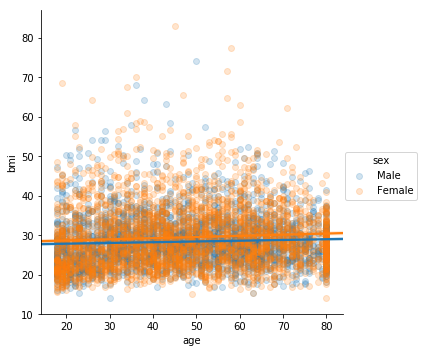

In [26]:
scatterplot = sns.lmplot(x="age", y="bmi", hue="sex", data=nhanes_adults, scatter_kws={"alpha":0.2})

This walkthrough should give you a hint of what is available via packages like NumPy, Pandas, Matplotlib, and Seaborn. They don't have all the features of a full statistical package like R, but you may now have an idea of why Python has become so popular in the sciences as a language to work with data. The notebook interface of [Jupyter](https://jupyter.org/) (formerly called [iPython Notebook](http://ipython.org/)) is a significant bonus, too, as it allows programmers to save work, results, plots, and commentary all in one document.

Be sure to take a look at the lecture notes for this week for more information, as well as the course Moodle site, which will have links to documentation and downloads for these and other packages. I hope this brief demonstration has piqued your interest!

Dave...